In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv("Food_and_Nutrition.csv", encoding="ISO-8859-1")
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


In [4]:
df.info

<bound method DataFrame.info of       Ages  Gender  Height  Weight     Activity Level Dietary Preference  \
0       25    Male     180      80  Moderately Active           Omnivore   
1       32  Female     165      65     Lightly Active         Vegetarian   
2       48    Male     175      95          Sedentary              Vegan   
3       55  Female     160      70        Very Active           Omnivore   
4       62    Male     170      85          Sedentary         Vegetarian   
...    ...     ...     ...     ...                ...                ...   
1693    53  Female     182      76          Sedentary              Vegan   
1694    38    Male     150      76        Very Active              Vegan   
1695    57    Male     165      73        Very Active              Vegan   
1696    40    Male     166      91   Extremely Active              Vegan   
1697    54  Female     198      75          Sedentary         Vegetarian   

      Daily Calorie Target  Protein  Sugar  Sodium  Cal

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Ages                    0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Sugar                   0
Sodium                  0
Calories                0
Carbohydrates           0
Fiber                   0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
Disease                 0
dtype: int64

In [7]:
df.describe

<bound method NDFrame.describe of       Ages  Gender  Height  Weight     Activity Level Dietary Preference  \
0       25    Male     180      80  Moderately Active           Omnivore   
1       32  Female     165      65     Lightly Active         Vegetarian   
2       48    Male     175      95          Sedentary              Vegan   
3       55  Female     160      70        Very Active           Omnivore   
4       62    Male     170      85          Sedentary         Vegetarian   
...    ...     ...     ...     ...                ...                ...   
1693    53  Female     182      76          Sedentary              Vegan   
1694    38    Male     150      76        Very Active              Vegan   
1695    57    Male     165      73        Very Active              Vegan   
1696    40    Male     166      91   Extremely Active              Vegan   
1697    54  Female     198      75          Sedentary         Vegetarian   

      Daily Calorie Target  Protein  Sugar  Sodium  C

In [8]:
# Looking at Target Column ('Disease')
print(df['Disease'].value_counts())

Weight Gain                                                                 1312
Weight Gain, Hypertension, Heart Disease                                     129
Weight Gain, Kidney Disease                                                   91
Weight Gain, Hypertension, Heart Disease, Kidney Disease                      82
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease                      45
Diabetes, Acne, Hypertension, Heart Disease                                   14
Hypertension, Heart Disease                                                    9
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease       5
Hypertension, Heart Disease, Kidney Disease                                    4
Kidney Disease                                                                 3
Hypertension, Kidney Disease                                                   2
Diabetes, Acne, Hypertension, Kidney Disease                                   1
Diabetes, Acne, Weight Loss,

In [9]:
# Creating a copy of the original data to avoid modifying it
data_exploded = df.copy()

# Spliting the 'Disease' column into multiple labels
data_exploded['Disease'] = data_exploded['Disease'].str.split(', ')

# Explode the 'Disease' column into separate rows
data_exploded = data_exploded.explode('Disease')

# Counting the frequency of each disease
disease_counts = data_exploded['Disease'].value_counts()
display(disease_counts)

common_diseases = disease_counts.index 

Weight Gain       1664
Hypertension       292
Heart Disease      289
Kidney Disease     189
Diabetes            66
Acne                66
Weight Loss          1
Name: Disease, dtype: int64

In [10]:
# Generating binary columns for each disease (0 or 1) one-hot encoding
for disease in common_diseases:
    data_exploded[disease] = (data_exploded['Disease'] == disease).astype(int)

display(data_exploded.head())

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Suggestion,Snack Suggestion,Disease,Weight Gain,Hypertension,Heart Disease,Kidney Disease,Diabetes,Acne,Weight Loss
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain,1,0,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Weight Gain,1,0,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Hypertension,0,1,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Heart Disease,0,0,1,0,0,0,0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,Lentil and vegetable curry,Trail mix,Weight Gain,1,0,0,0,0,0,0


Classification Report for Acne:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      0.93      0.97        15

    accuracy                           1.00       340
   macro avg       1.00      0.97      0.98       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Diabetes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      0.93      0.97        15

    accuracy                           1.00       340
   macro avg       1.00      0.97      0.98       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Heart Disease:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       280
           1       0.84      0.45      0.59        60

    accuracy                           0.89       340
   macro avg       

/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/MuhammadUsman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


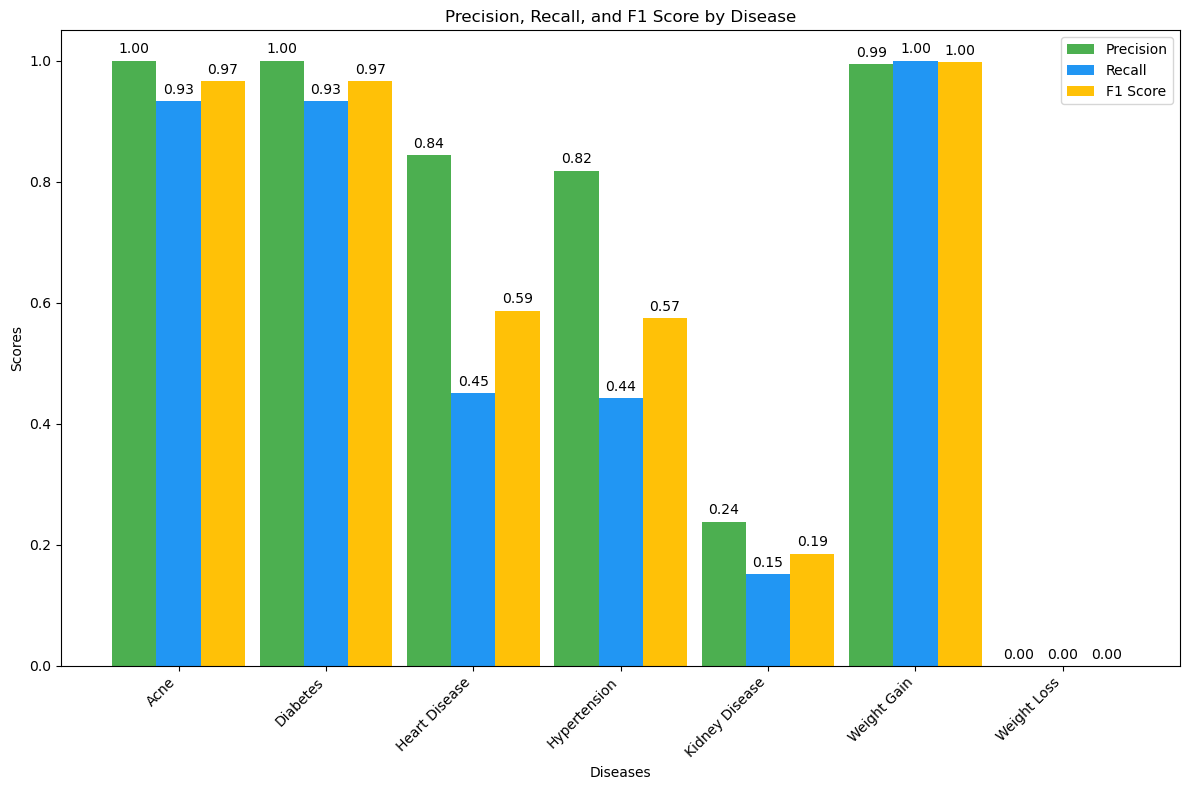

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Load the dataset
df = pd.read_csv('Food_and_Nutrition.csv')

# Step 1: Select relevant columns
df = df[['Weight', 'Activity Level', 'Dietary Preference', 'Daily Calorie Target', 'Disease']]

# Step 2: Split the Disease column into lists of diseases
df['Disease'] = df['Disease'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Step 3: Transform the Disease column into a binary matrix
mlb = MultiLabelBinarizer()
disease_matrix = mlb.fit_transform(df['Disease'])
disease_df = pd.DataFrame(disease_matrix, columns=mlb.classes_)

# Step 4: Combine with original features
df = df.drop(columns=['Disease'])
df = pd.concat([df, disease_df], axis=1)

# Step 5: Encode categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['Activity Level', 'Dietary Preference'], drop_first=True)

# Step 6: Split into features and targets
X = df.drop(columns=mlb.classes_)
y = df[mlb.classes_]

# Step 7: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Initialize and train the model
base_model = RandomForestClassifier(random_state=42, class_weight='balanced')
model = MultiOutputClassifier(base_model)
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Ensure predictions are in binary format
y_pred = np.array(y_pred)  # Ensure numerical/binary format
y_test = np.array(y_test)

# Step 10: Evaluate the model with zero_division parameter
for i, disease in enumerate(mlb.classes_):
    print(f"Classification Report for {disease}:")
    print(classification_report(y_test[:, i], y_pred[:, i], zero_division=0))
    print("=" * 50)



# Step 11: Aggregate Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average=None, labels=range(len(mlb.classes_))
)

# Step 12: Plot Precision, Recall, and F1 Score for each disease
x = np.arange(len(mlb.classes_))
width = 0.3

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='#4CAF50')
rects2 = ax.bar(x, recall, width, label='Recall', color='#2196F3')
rects3 = ax.bar(x + width, f1, width, label='F1 Score', color='#FFC107')

ax.set_xlabel('Diseases')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score by Disease')
ax.set_xticks(x)
ax.set_xticklabels(mlb.classes_, rotation=45, ha="right")
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Step 1: Load the dataset
df = pd.read_csv('Food_and_Nutrition.csv')

# Step 2: Select relevant columns
df = df[['Weight', 'Activity Level', 'Dietary Preference', 'Daily Calorie Target', 'Disease']]

# Step 3: Split the Disease column into lists of diseases
df['Disease'] = df['Disease'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Step 4: Transform the Disease column into a binary matrix
mlb = MultiLabelBinarizer()
disease_matrix = mlb.fit_transform(df['Disease'])
disease_df = pd.DataFrame(disease_matrix, columns=mlb.classes_)

# Step 5: Combine with original features and drop 'Disease'
df = df.drop(columns=['Disease'])
df = pd.concat([df, disease_df], axis=1)

# Step 6: One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['Activity Level', 'Dietary Preference']])
encoded_feature_names = encoder.get_feature_names_out(['Activity Level', 'Dietary Preference'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)


# Step 7: Combine the encoded features with the original DataFrame
df = pd.concat([df.drop(columns=['Activity Level', 'Dietary Preference']), encoded_df], axis=1)

# Step 8: Split into features and targets
X = df.drop(columns=mlb.classes_)
y = df[mlb.classes_]

# Step 9: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Initialize and train the model
base_model = RandomForestClassifier(random_state=42, class_weight='balanced')
model = MultiOutputClassifier(base_model)
model.fit(X_train, y_train)

# Step 11: Make predictions
y_pred = model.predict(X_test)

# Step 12: Evaluate the model for each disease
for i, disease in enumerate(mlb.classes_):
    print(f"Classification Report for {disease}:")
    print(classification_report(y_test[disease], y_pred[:, i], zero_division=0))
    print("=" * 50)

# Step 13: Aggregate Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average=None, zero_division=0
)

# Step 14: Print the metrics
print("Overall Metrics by Disease:")
for i, disease in enumerate(mlb.classes_):
    print(f"{disease} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1 Score: {f1[i]:.2f}")


Classification Report for Acne:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      0.93      0.97        15

    accuracy                           1.00       340
   macro avg       1.00      0.97      0.98       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Diabetes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      0.93      0.97        15

    accuracy                           1.00       340
   macro avg       1.00      0.97      0.98       340
weighted avg       1.00      1.00      1.00       340

Classification Report for Heart Disease:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       280
           1       0.84      0.45      0.59        60

    accuracy                           0.89       340
   macro avg       